## Imports

In [1]:
from web3 import Web3
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


Bad key text.latex.preview in file C:\Users\GABRIELA\Miniconda3\envs\datascience\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 123 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.6.0/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file C:\Users\GABRIELA\Miniconda3\envs\datascience\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 155 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.6.0/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.jpeg_quality in file C:\Users\GABRIELA\Miniconda3\envs\datascience\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 418 ('savefig.jpeg_quality: 95       # w

## Connections

In [2]:
infura_url= 'https://mainnet.infura.io/v3/c94afc5937c843b39a39d595881c5dc1'
web3= Web3(Web3.HTTPProvider (infura_url))
web3.isConnected()

True

## Block Height

In [3]:
latest = web3.eth.blockNumber

In [4]:
print ("The latest block is: ", latest)

The latest block is:  15652876


## Time

In [5]:
block_timestamp= web3.eth.get_block(latest).timestamp
block_timestamp

1664622047

In [6]:
block_timestamp = int(block_timestamp)
print(datetime.utcfromtimestamp(block_timestamp).strftime('%Y-%m-%d %H:%M:%S'))

2022-10-01 11:00:47


## Block size

In [7]:
block_size= web3.eth.get_block(latest).size
print (block_size)

9165


In [8]:
blocks_timestamp=[]
blocks_size=[]

for i in range(0, 100):
    block= (web3.eth.getBlock(latest - i))
    blocks_size.append (block.size)
    blocks_timestamp.append(block.timestamp)

df_sizes = pd.DataFrame(list(zip(blocks_timestamp, blocks_size)),
               columns =['date', 'size'])
df_sizes.head()

,date,size
0,1664622047,9165
1,1664622035,82223
2,1664622023,281145
3,1664622011,46567
4,1664621999,88005


### Graphically

In [9]:
df_sizes['datetime'] = pd.to_datetime(df_sizes['date'],unit='s')
df_sizes.drop(columns="date", inplace= True)

In [10]:
df_sizes.head()

,size,datetime
0,9165,2022-10-01 11:00:47
1,82223,2022-10-01 11:00:35
2,281145,2022-10-01 11:00:23
3,46567,2022-10-01 11:00:11
4,88005,2022-10-01 10:59:59


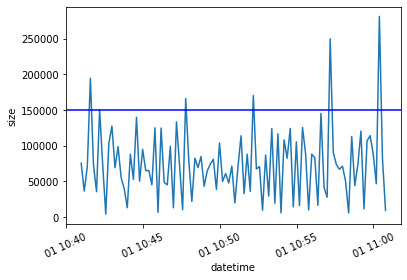

In [19]:
sns.lineplot(x = "datetime", y = "size",
             data = df_sizes)
plt.axhline(y = 150000, color = 'b', linestyle = '-')  
plt.xticks(rotation = 25)
plt.show()